# Geodesics in Kerr spacetime
## Computation with `kerrgeodesic_gw`

This Jupyter notebook requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw) (version $\geq$ 0.3). To install the latter, simply run 
```
sage -pip install kerrgeodesic_gw
```
in a terminal.

In [1]:
version()

'SageMath version 9.4, Release Date: 2021-08-22'

First, we set up the notebook to use LaTeX-formatted display:

In [2]:
%display latex

and we ask for CPU demanding computations to be performed in parallel on 8 processes:

In [3]:
Parallelism().set(nproc=8)

A Kerr black bole is entirely defined by two parameters $(m, a)$, where $m$ is the black hole mass and $a$ is the black hole angular momentum divided by $m$.
In this notebook, we shall set $m=1$ and we denote the angular momentum parameter $a$ by the symbolic variable `a`, using `a0` for a specific numerical value:

In [4]:
a = var('a')
a0 = 0.998

The spacetime object is created as an instance of the class `KerrBH`:

In [5]:
from kerrgeodesic_gw import KerrBH
M = KerrBH(a)
print(M)

Kerr spacetime M


The object `M` is endowed with many methods, which can be discovered via the TAB key:

In [6]:
# M.<TAB>

One of them returns the Boyer-Lindquist coordinate $r$ of the event horizon:

In [7]:
rH = M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [8]:
rH0 = rH.subs({a: a0})
rH0

1.06321392251712

Another one returns the chart of Boyer-Lindquist coordinates and allows the user to instanciate the Python variables `(t, r, th, ph)` to the coordinates $(t,r,\theta,\phi)$:

In [9]:
BL.<t, r, th, ph> = M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

The metric tensor is naturally returned by the method `metric()`:

In [10]:
g = M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt⊗dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt⊗dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr⊗dr + (a^2*cos(th)^2 + r^2) dth⊗dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph⊗dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph⊗dph

Again many methods are available on metric objects and one can discover them via the TAB key:

In [11]:
# g.<TAB>

For instance `christoffel_symbols_display()` computes the Christofell symbols with respect to the default chart (Boyer-Lindquist) and displays them:

In [12]:
g.christoffel_symbols_display()

Gam^t_t,r = -(a^4 - r^4 - (a^4 + a^2*r^2)*sin(th)^2)/(a^2*r^4 + r^6 - 2*r^5 + (a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^4 + 2*(a^4*r^2 + a^2*r^4 - 2*a^2*r^3)*cos(th)^2) 
Gam^t_t,th = -2*a^2*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_r,ph = -(a^3*r^2 + 3*a*r^4 - (a^5 - a^3*r^2)*cos(th)^2)*sin(th)^2/(a^2*r^4 + r^6 - 2*r^5 + (a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^4 + 2*(a^4*r^2 + a^2*r^4 - 2*a^2*r^3)*cos(th)^2) 
Gam^t_th,ph = -2*(a^5*r*cos(th)*sin(th)^5 - (a^5*r + a^3*r^3)*cos(th)*sin(th)^3)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,t = (a^2*r^2 + r^4 - 2*r^3 - (a^4 + a^2*r^2 - 2*a^2*r)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,ph = -(a^3*r^2 + a*r^4 - 2*a*r^3 - (a^5 + a^3*r^2 - 2*a^3*r)*cos(th)^2)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_r,r = ((a^2*r - a^2)*sin(th)^2 + a^2 - r^2)/(a^2*r^2 + r^4 - 2*r^3 + (a^4 + a^2*r^2 - 2*a^2*r)*cos(th)^2) 
Gam^r_r,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^r_th,th = -(a^2*r + r^3 - 2*r^2)/(a^2*cos(th)^2 + r^2) 
Gam^r_ph,ph = ((a^4*r^2 + a^2*r^4 - 2*a^2*r^3 - (a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^2)*sin(th)^4 - (a^2*r^5 + r^7 - 2*r^6 + (a^6*r + a^4*r^3 - 2*a^4*r^2)*cos(th)^4 + 2*(a^4*r^3 + a^2*r^5 - 2*a^2*r^4)*cos(th)^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,t = -2*a^2*r*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,ph = 2*(a^3*r + a*r^3)*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_r,r = a^2*cos(th)*sin(th)/(a^2*r^2 + r^4 - 2*r^3 + (a^4 + a^2*r^2 - 2*a^2*r)*cos(th)^2) 
Gam^th_r,th = r/(a^2*cos(th)^2 + r^2) 
Gam^th_th,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^th_ph,ph = -((a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^5 + 2*(a^4*r^2 + a^2*r^4 - 2*a^2*r^3)*cos(th)^3 + (a^2*r^4 + r^6 + 2*a^4*r + 4*a^2*r^3)*cos(th))*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,r = -(a^3*cos(th)^2 - a*r^2)/(a^2*r^4 + r^6 - 2*r^5 + (a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^4 + 2*(a^4*r^2 + a^2*r^4 - 2*a^2*r^3)*cos(th)^2) 
Gam^ph_t,th = -2*a*r*cos(th)/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th)) 
Gam^ph_r,ph = (r^5 + (a^4*r - a^4)*cos(th)^4 - a^2*r^2 - 2*r^4 + (2*a^2*r^3 + a^4 - a^2*r^2)*cos(th)^2)/(a^2*r^4 + r^6 - 2*r^5 + (a^6 + a^4*r^2 - 2*a^4*r)*cos(th)^4 + 2*(a^4*r^2 + a^2*r^4 - 2*a^2*r^3)*cos(th)^2) 
Gam^ph_th,ph = (a^4*cos(th)^5 + 2*(a^2*r^2 - a^2*r)*cos(th)^3 + (r^4 + 2*a^2*r)*cos(th))/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th))

The Riemann curvature tensor is naturally returned by the method `riemann()`

In [13]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the Kerr spacetime M


The $R^t_{rtr}$ and $R^t_{r\theta\phi}$ components:

In [14]:
Riem[0,1,0,1]

(3*a^4*r*cos(th)^4 + 3*a^2*r^3 + 2*r^5 - (9*a^4*r + 7*a^2*r^3)*cos(th)^2)/(a^2*r^6 + r^8 - 2*r^7 + (a^8 + a^6*r^2 - 2*a^6*r)*cos(th)^6 + 3*(a^6*r^2 + a^4*r^4 - 2*a^4*r^3)*cos(th)^4 + 3*(a^4*r^4 + a^2*r^6 - 2*a^2*r^5)*cos(th)^2)

In [15]:
Riem[0,1,2,3]

-((a^7 + a^5*r^2 - 2*a^5*r)*cos(th)^5 - (3*a^7 + 8*a^5*r^2 + 5*a^3*r^4 - 2*a^5*r - 6*a^3*r^3)*cos(th)^3 + 3*(3*a^5*r^2 + 5*a^3*r^4 + 2*a*r^6 - 2*a^3*r^3)*cos(th))*sin(th)/(a^2*r^6 + r^8 - 2*r^7 + (a^8 + a^6*r^2 - 2*a^6*r)*cos(th)^6 + 3*(a^6*r^2 + a^4*r^4 - 2*a^4*r^3)*cos(th)^4 + 3*(a^4*r^4 + a^2*r^6 - 2*a^2*r^5)*cos(th)^2)

Of course, since the Kerr metric is a solution of the **vacuum Einstein equation**, the Ricci tensor identically vanishes:

In [16]:
g.ricci().display()

Ric(g) = 0

## Bound timelike geodesic

Let us choose the initial point $P$ for the geodesic:

In [17]:
P = M.point((0, 6, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


A geodesic is constructed by providing the range $[\lambda_{\rm min},\lambda_{\rm max}]$ of the affine parameter $\lambda$, the initial point and either 
 - (i) the Boyer-Lindquist components $(p^t_0, p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector
   $p_0 = \left. \frac{\mathrm{d}x}{\mathrm{d}\lambda}\right| _{\lambda_{\rm min}}$,
 - (ii) the four integral of motions $(\mu, E, L, Q)$
 - or (iii) some of the components of $p_0$ along with with some integrals of motion. 
We shall also specify some numerical value for the Kerr spin parameter $a$.

Examples of (i) and (iii) are provided below. Here, we choose $\lambda\in[0, 300\, m]$, the option (ii) and 
$a=0.998 \,m$, where $m$ in the black hole mass::


In [18]:
Li = M.geodesic([0, 300], P, mu=1, E=0.883, L=1.982, Q=0.467, a_num=0.998,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.29225788954106 ∂/∂t + 0.00438084990626460 ∂/∂r + 0.0189826106258554 ∂/∂th + 0.0646134478134985 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [19]:
print(Li)

Geodesic Li of the Kerr spacetime M


The numerical integration of the geodesic equation is performed via `integrate()`, by providing the integration step $\delta\lambda$ in units of $m$:

In [20]:
Li.integrate(step=0.005)

We can then plot the geodesic:

In [21]:
Li.plot()

Graphics3d Object

Actually, many options can be passed to the method `plot()`. For instance to a get a 3D spacetime diagram:

In [22]:
Li.plot(coordinates='txy')

Graphics3d Object

or to get the trace of the geodesic in the $(x,y)$ plane:

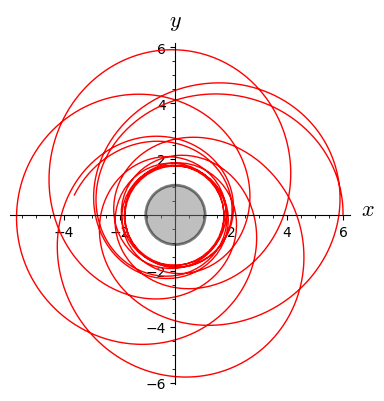

In [23]:
Li.plot(coordinates='xy', plot_points=2000)

or else to get the trace in the $(x,z)$ plane:

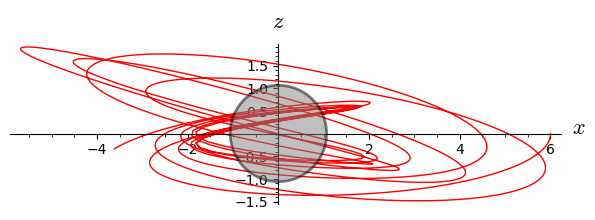

In [24]:
Li.plot(coordinates='xz')

As a curve, the geodesic $\mathcal{L}$ is a map from an interval of $\mathbb{R}$ to the spacetime $M$:

In [25]:
Li.display()

Li: (0, 300) → M

In [26]:
Li.domain()

Real interval (0, 300)

In [27]:
Li.codomain()

Kerr spacetime M

It maps values of $\lambda$ to spacetime points:

In [28]:
Li(0)

Point on the Kerr spacetime M

In [29]:
Li(0).coordinates()  # coordinates in the default chart (BL)

(0.0, 6.0, 1.5707963267948966, 0.0)

In [30]:
BL(Li(0))  # equivalent to above

(0.0, 6.0, 1.5707963267948966, 0.0)

In [31]:
Li(300).coordinates()

(553.4637326813786, 3.703552505462962, 1.6613834863942039, 84.62814710987239)

The initial 4-momentum vector $p_0$ is returned by the method `initial_tangent_vector()`:

In [32]:
p0 = Li.initial_tangent_vector()
print(p0)

Tangent vector p at Point P on the Kerr spacetime M


In [33]:
p0 in M.tangent_space(P)

True

In [34]:
p0.display()

p = 1.29225788954106 ∂/∂t + 0.00438084990626460 ∂/∂r + 0.0189826106258554 ∂/∂th + 0.0646134478134985 ∂/∂ph

In [35]:
p0[:]

[1.29225788954106, 0.00438084990626460, 0.0189826106258554, 0.0646134478134985]

For instance, the components $p^t_0$ and $p^\phi_0$ are recovered by

In [36]:
p0[0], p0[3]

(1.29225788954106, 0.0646134478134985)

Let us check that the scalar square of $p_0$ is $-1$, i.e. is consistent with the mass parameter $\mu = 1$ used in the construction of the geodesic:

In [37]:
g = M.metric()
g.at(P)(p0, p0).subs(a=0.998)

-1.00000000000000

The 4-momentum vector $p$ at any value of the affine parameter $\lambda$ is obtained by
the method `evaluate_tangent_vector()`; for instance, for $\lambda=200\,m$: 

In [38]:
p = Li.evaluate_tangent_vector(200)
p.display()

1.316592599498746 ∂/∂t - 0.07370434215844164 ∂/∂r - 0.01091195426423706 ∂/∂th + 0.07600209768075264 ∂/∂ph

In [39]:
p in M.tangent_space(Li(200))

True

The particle mass $\mu$ computed at a given value of $\lambda$ is returned by the method `evaluate_mu()`:

In [40]:
Li.evaluate_mu(0)

1.00000000000000

Of course, it should be conserved along $\mathcal{L}$; actually it is, up to the numerical accuracy::

In [41]:
Li.evaluate_mu(300)

1.0000117978600134

Similarly, the conserved energy $E$, conserved angular momentum $L$ and Carter constant $Q$ are computed at any value of $\lambda$ by respectively `evaluate_E()`, `evaluate_L()` and `evaluate_Q()`:

In [42]:
Li.evaluate_E(0)

0.883000000000000

In [43]:
Li.evaluate_L(0)

1.98200000000000

In [44]:
Li.evaluate_Q(0)

0.467000000000000

Let us check that the values of $\mu$, $E$, $L$ and $Q$ evaluated at $\lambda=300 \, m$ are equal to those at $\lambda=0$ up to the numerical accuracy of the integration scheme:

In [45]:
Li.check_integrals_of_motion(300)

quantity,value,initial value,diff.,relative diff.
\(\mu^2\),\(1.0000235958592163\),\(1.00000000000000\),\(0.00002360\),\(0.00002360\)
\(E\),\(0.883067996080701\),\(0.883000000000000\),\(0.00006800\),\(0.00007701\)
\(L\),\(1.98248080818931\),\(1.98200000000000\),\(0.0004808\),\(0.0002426\)
\(Q\),\(0.467214137649741\),\(0.467000000000000\),\(0.0002141\),\(0.0004585\)


Decreasing the integration step leads to smaller errors:

In [46]:
Li.integrate(step=0.001)
Li.check_integrals_of_motion(300)

quantity,value,initial value,diff.,relative diff.
\(\mu^2\),\(1.0000047183936422\),\(1.00000000000000\),\(4.718 \times 10^{-6}\),\(4.718 \times 10^{-6}\)
\(E\),\(0.883013604456676\),\(0.883000000000000\),\(0.00001360\),\(0.00001541\)
\(L\),\(1.98209626120918\),\(1.98200000000000\),\(0.00009626\),\(0.00004857\)
\(Q\),\(0.467042771975860\),\(0.467000000000000\),\(0.00004277\),\(0.00009159\)


## Various ways to initialize a geodesic

Instead of providing the integral of motions, as for ``Li`` above, one can initialize a geodesic by providing the Boyer-Lindquist components $(p^t_0, p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector $p_0$. For instance:

In [47]:
print(p0)

Tangent vector p at Point P on the Kerr spacetime M


In [48]:
p0[:]

[1.29225788954106, 0.00438084990626460, 0.0189826106258554, 0.0646134478134985]

In [49]:
Li2 = M.geodesic([0, 300], P, pt0=p0[0], pr0=p0[1], pth0=p0[2], pph0=p0[3], 
                 a_num=0.998)
Li2.initial_tangent_vector() == p0

True

As a check, we recover the same values of $(\mu, E, L, Q)$ as those that were used to initialize ``Li``:

In [50]:
Li2.evaluate_mu(0)

1.00000000000000

In [51]:
Li2.evaluate_E(0)

0.883000000000000

In [52]:
Li2.evaluate_L(0)

1.98200000000000

In [53]:
Li2.evaluate_Q(0)

0.467000000000000

We may also initialize a geodesic by providing the mass $\mu$ and the three spatial components $(p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector:

In [54]:
Li3 = M.geodesic([0, 300], P, mu=1, pr0=p0[1], pth0=p0[2], pph0=p0[3], 
                 a_num=0.998)

The component $p^t_0$ is then automatically computed:

In [55]:
Li3.initial_tangent_vector()[:]  

[1.29225788954106, 0.00438084990626460, 0.0189826106258554, 0.0646134478134985]

and we check the identity with the initial vector of ``Li``, up to numerical errors:

In [56]:
(Li3.initial_tangent_vector() - p0)[:] 

[2.22044604925031e-16, 0, 0, 0]

Another way to initialize a geodesic is to provide the conserved energy $E$, the conserved angular momentum $L$ and the two components $(p^r_0, p^\theta_0)$ of the initial 4-momentum vector:

In [57]:
Li4 = M.geodesic([0, 300], P, E=0.8830, L=1.982, pr0=p0[1], pth0=p0[2], 
                 a_num=0.998)
Li4.initial_tangent_vector()[:]

[1.29225788954106, 0.00438084990626460, 0.0189826106258554, 0.0646134478134985]

Again, we get a geodesic equivalent to ``Li``:

In [58]:
(Li4.initial_tangent_vector() - p0)[:] 

[0, 0, 0, 0]

## Ingoing null geodesic with negative angular momentum

We choose a ingoing null geodesic in the equatorial plane with $L = -6 E < 0$, starting at the point of Boyer-Lindquist coordinates $(t,r,\theta,\phi) = (0, 12, \pi/2, 0)$:

In [59]:
lambda_max = 13.063
Li = M.geodesic([0, lambda_max], M((0,12,pi/2,0)), mu=0, E=1, L=-6, Q=0,
                r_increase=False, a_num=a0, name='Li', latex_name=r'\mathcal{L}', 
                verbose=True)

Initial tangent vector: 


p = 1.20797381595070 ∂/∂t - 0.901996260873419 ∂/∂r - 0.0399489777089388 ∂/∂ph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [60]:
Li.integrate(step=0.00002)

We plot the trajectory of the geodesic in the equatorial plane with the tangent vector at 6 points:

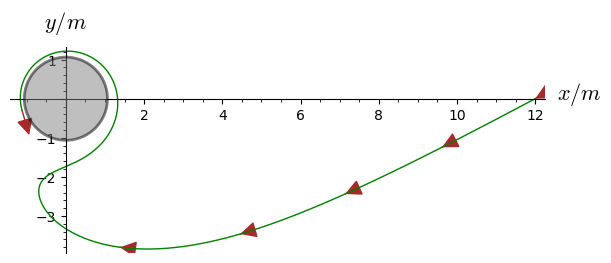

In [61]:
Li.plot(coordinates='xy', color='green', prange=[0, lambda_max], plot_points=40000, 
        display_tangent=True, scale=0.002, color_tangent='brown',
        plot_points_tangent=6, axes_labels=[r'$x/m$', r'$y/m$'])

Note the turning point in $\phi$ and the final winding in the direction of the black
rotation (counterclockwise in the figure).

In [62]:
Li.check_integrals_of_motion(0.99999*lambda_max)

quantity,value,initial value,diff.,relative diff.
\(\mu^2\),\(0.000211815000511706\),\(0.000000000000000\),\(0.0002118\),-
\(E\),\(1.00000186057173\),\(1.00000000000000\),\(1.861 \times 10^{-6}\),\(1.861 \times 10^{-6}\)
\(L\),\(-5.99999596865291\),\(-6.00000000000000\),\(4.031 \times 10^{-6}\),\(-6.719 \times 10^{-7}\)
\(Q\),\(1.31244559310830 \times 10^{-31}\),\(0\),\(1.312 \times 10^{-31}\),-
